In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-white')

from scipy.stats import spearmanr

In [2]:
frestaurants = '../data/cityhealthdashboard/restaurant_category_counts.csv'
fcityhealth = '../data/cityhealthdashboard/city_health_wide_data.csv'

df_rest = pd.read_csv(frestaurants, dtype={'ZIP': str})
df_health = pd.read_csv(fcityhealth, dtype={'zip_code': str})

In [3]:
df_rest.head()

,ZIP,AfricanCuisine,Asian,BBQ,Cafe,Caribean,Diner,Fast food,Fastfood,FrenchCuisine,...,Icecream,Italian,LACuisine,MediterraneanCuisine,Other,Pizza,Pub,Seafood,Stand,total
0,02108,NaN,5.0,2.0,16.0,NaN,NaN,NaN,6.0,NaN,...,6.0,2.0,11.0,NaN,47.0,1.0,16.0,1.0,NaN,116.0
1,02109,NaN,5.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,15.0,NaN,60.0,2.0,12.0,2.0,NaN,123.0
2,02110,NaN,2.0,NaN,31.0,NaN,NaN,NaN,5.0,NaN,...,8.0,1.0,19.0,NaN,68.0,1.0,13.0,5.0,NaN,157.0
3,02111,NaN,11.0,1.0,29.0,NaN,NaN,NaN,10.0,NaN,...,5.0,NaN,9.0,NaN,66.0,2.0,12.0,NaN,NaN,150.0
4,02113,NaN,1.0,NaN,7.0,NaN,NaN,NaN,2.0,NaN,...,NaN,15.0,7.0,NaN,52.0,1.0,1.0,1.0,NaN,89.0


In [4]:
df_rest.drop('ZIP', axis=1).sum()

AfricanCuisine             1.0
Asian                    100.0
BBQ                        8.0
Cafe                     449.0
Caribean                   4.0
Diner                      1.0
Fast food                  1.0
Fastfood                 129.0
FrenchCuisine              2.0
Grill                    104.0
Ice Cream                  1.0
Icecream                 137.0
Italian                   36.0
LACuisine                311.0
MediterraneanCuisine       1.0
Other                   1285.0
Pizza                    127.0
Pub                      240.0
Seafood                   29.0
Stand                     55.0
total                   3021.0
dtype: float64

In [5]:
# Remove restaurant categories with too few restaurants
small_cats = ['AfricanCuisine', 'BBQ', 'Caribean', 'Diner', 'Fast food', 'FrenchCuisine',
              'Ice Cream', 'MediterraneanCuisine']
df_rest = df_rest.drop(small_cats, axis=1)

In [6]:
df_health.head()

,zip_code,Air pollution - particulate matter,Binge drinking,Children in Poverty,Dental care,Diabetes,Frequent mental distress,Frequent physical distress,High blood pressure,"Housing cost, excessive",...,Lead exposure risk index,Life expectancy,Limited access to healthy foods,Obesity,Physical inactivity,Preventive services,Racial/ethnic diversity,Smoking,Unemployment,Uninsurance
0,02108,7.9,25.4,0.00,85.300000,4.70,7.800000,5.600000,19.900000,34.300000,...,9.000000,82.30,0.0,15.400000,14.400000,40.50,21.600000,7.400000,5.200000,3.200000
1,02109,7.9,28.4,0.00,82.200000,3.90,8.900000,5.600000,16.600000,42.900000,...,6.000000,82.30,0.0,14.900000,14.800000,38.20,28.800000,8.900000,2.600000,0.400000
2,02111,7.9,23.1,20.80,74.300000,6.50,10.200000,7.300000,20.700000,41.800000,...,6.000000,83.10,0.0,15.300000,20.300000,32.40,66.300000,11.500000,7.800000,1.500000
3,02113,7.9,28.3,0.00,77.166667,3.80,10.366667,6.266667,16.133333,40.333333,...,8.666667,81.45,0.0,15.633333,16.833333,35.50,25.533333,11.166667,2.066667,1.466667
4,02114,7.9,25.5,3.62,77.740000,5.28,9.960000,7.020000,19.680000,40.980000,...,6.000000,81.86,0.0,16.880000,18.120000,36.08,49.900000,10.980000,5.120000,2.300000


In [7]:
df = pd.merge(df_rest, df_health, left_on='ZIP', right_on='zip_code')
data = df.drop(['ZIP', 'zip_code'], axis=1).fillna(0)

corrdf = data.corr(method='spearman')
corrdf.head()

,Asian,Cafe,Fastfood,Grill,Icecream,Italian,LACuisine,Other,Pizza,Pub,...,Lead exposure risk index,Life expectancy,Limited access to healthy foods,Obesity,Physical inactivity,Preventive services,Racial/ethnic diversity,Smoking,Unemployment,Uninsurance
Asian,1.000000,0.556124,0.630923,0.536312,0.560928,0.213106,0.521193,0.672872,0.375188,0.500398,...,0.101224,0.483672,-0.330629,-0.372322,-0.316489,0.202664,0.081436,-0.337825,-0.078968,0.107363
Cafe,0.556124,1.000000,0.481149,0.673879,0.452044,0.145855,0.785714,0.872973,0.142285,0.885308,...,-0.031111,0.543912,-0.320975,-0.379934,-0.438055,0.442032,-0.155705,-0.446077,-0.378710,-0.121004
Fastfood,0.630923,0.481149,1.000000,0.794106,0.540381,0.236708,0.495002,0.572623,0.300530,0.440026,...,0.264853,0.218317,-0.111588,-0.102290,-0.067886,0.049763,0.042698,-0.062367,0.063586,0.342864
Grill,0.536312,0.673879,0.794106,1.000000,0.514703,0.143573,0.680693,0.729756,0.290701,0.599154,...,0.009136,0.320939,-0.077076,-0.147129,-0.175257,0.178657,0.034001,-0.167710,-0.191948,0.240358
Icecream,0.560928,0.452044,0.540381,0.514703,1.000000,0.298206,0.336103,0.446828,0.262806,0.529659,...,0.252625,0.200263,-0.236962,0.018710,-0.033367,0.069540,0.008108,-0.088420,-0.109144,0.183078


In [8]:
rest_categories = df_rest.drop(['ZIP', 'total', 'Other'], axis=1).columns
health_categories = df_health.drop('zip_code', axis=1).columns

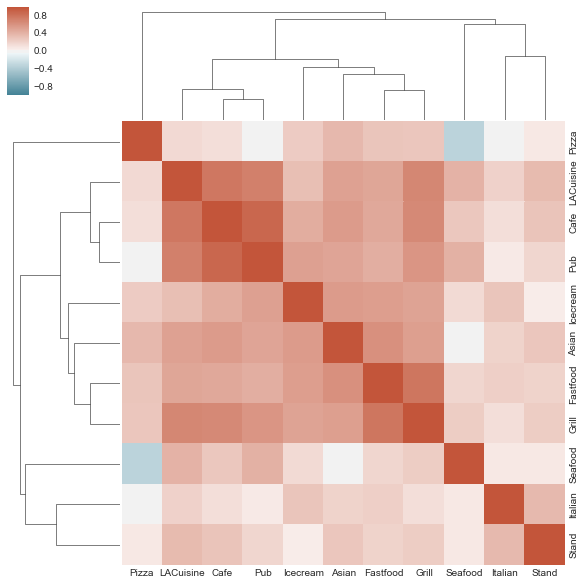

In [9]:
toplot = corrdf.loc[rest_categories, rest_categories]

vmax = max(toplot.max().max(), -toplot.min().min())
sns.clustermap(toplot,
              cmap=sns.diverging_palette(220, 20, center='light', as_cmap=True),
              vmax=vmax, vmin=-vmax)

In [10]:
# Significance
spearmanr(data['Pizza'], data['Seafood'])

SpearmanrResult(correlation=-0.31752476294092746, pvalue=0.1065452586377605)

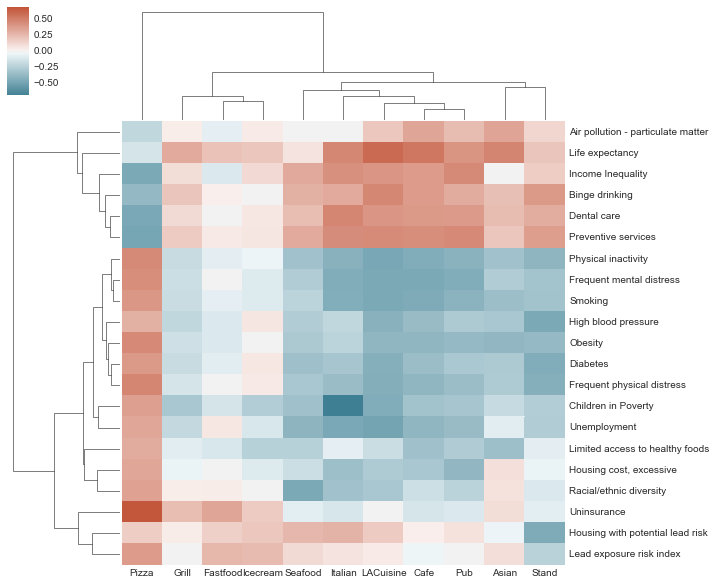

In [11]:
toplot = corrdf.loc[health_categories, rest_categories]

vmax = max(toplot.max().max(), -toplot.min().min())
sns.clustermap(toplot,
              cmap=sns.diverging_palette(220, 20, center='light', as_cmap=True),
              vmax=vmax, vmin=-vmax)

In [12]:
corrdf.loc[rest_categories, 'Limited access to healthy foods'].sort_values()

Asian       -0.330629
Cafe        -0.320975
Pub         -0.263031
Icecream    -0.236962
Seafood     -0.232234
LACuisine   -0.161822
Fastfood    -0.111588
Grill       -0.077076
Stand       -0.066932
Italian     -0.061518
Pizza        0.313353
Name: Limited access to healthy foods, dtype: float64

In [13]:
corrdf.loc[rest_categories, 'Binge drinking'].sort_values()

Pizza       -0.363519
Icecream    -0.001715
Fastfood     0.028572
Grill        0.206198
Asian        0.231849
Seafood      0.293384
Pub          0.315050
Italian      0.320048
Cafe         0.385346
Stand        0.395600
LACuisine    0.470859
Name: Binge drinking, dtype: float64

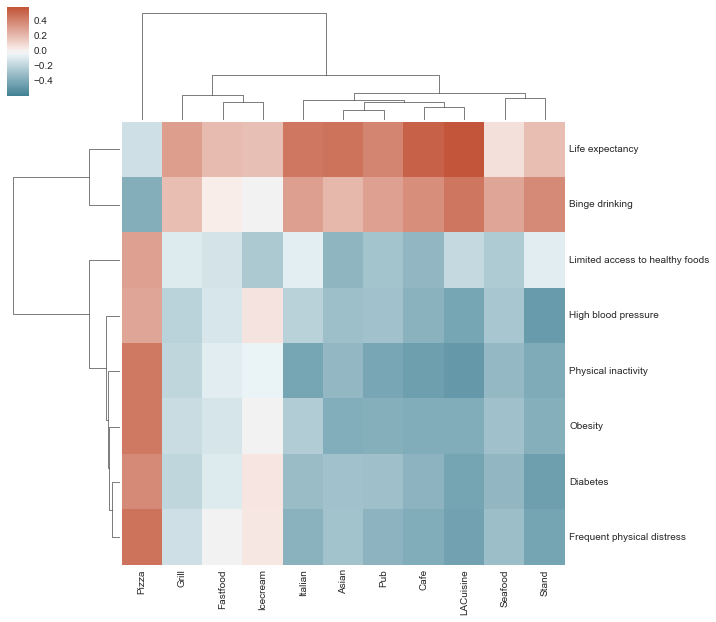

In [14]:
health_outcomes = ['High blood pressure',
                   'Diabetes',
                   'Physical inactivity',
                   'Life expectancy',
                   'Obesity',
                   'Binge drinking',
                   'Frequent physical distress',
                   'Limited access to healthy foods']

toplot = corrdf.loc[health_outcomes, rest_categories]

vmax = max(toplot.max().max(), -toplot.min().min())
sns.clustermap(toplot,
              cmap=sns.diverging_palette(220, 20, center='light', as_cmap=True),
              vmax=vmax, vmin=-vmax)

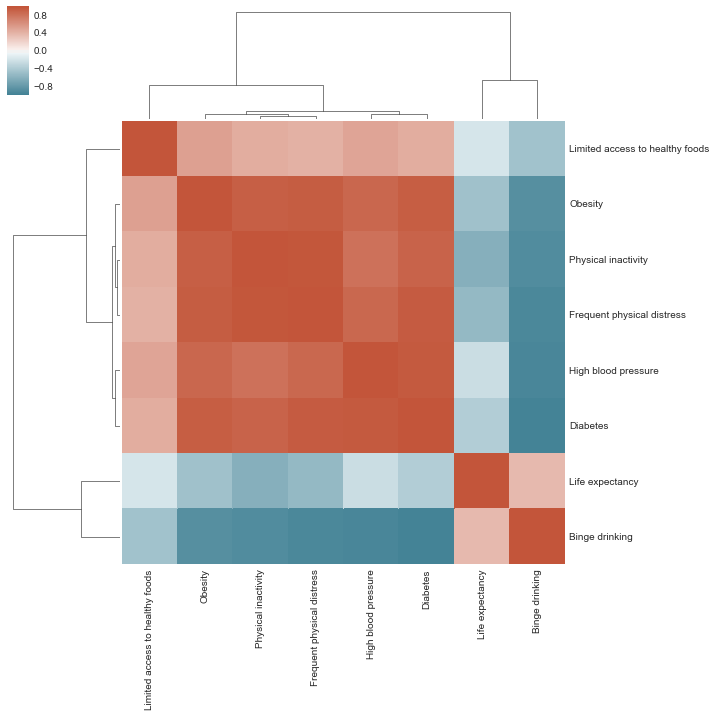

In [15]:
toplot = corrdf.loc[health_outcomes, health_outcomes]

vmax = max(toplot.max().max(), -toplot.min().min())
sns.clustermap(toplot,
              cmap=sns.diverging_palette(220, 20, center='light', as_cmap=True),
              vmax=vmax, vmin=-vmax)

In [16]:
df.head()

,ZIP,Asian,Cafe,Fastfood,Grill,Icecream,Italian,LACuisine,Other,Pizza,...,Lead exposure risk index,Life expectancy,Limited access to healthy foods,Obesity,Physical inactivity,Preventive services,Racial/ethnic diversity,Smoking,Unemployment,Uninsurance
0,02108,5.0,16.0,6.0,3.0,6.0,2.0,11.0,47.0,1.0,...,9.000000,82.30,0.0,15.400000,14.400000,40.50,21.600000,7.400000,5.200000,3.200000
1,02109,5.0,20.0,NaN,3.0,4.0,NaN,15.0,60.0,2.0,...,6.000000,82.30,0.0,14.900000,14.800000,38.20,28.800000,8.900000,2.600000,0.400000
2,02111,11.0,29.0,10.0,5.0,5.0,NaN,9.0,66.0,2.0,...,6.000000,83.10,0.0,15.300000,20.300000,32.40,66.300000,11.500000,7.800000,1.500000
3,02113,1.0,7.0,2.0,2.0,NaN,15.0,7.0,52.0,1.0,...,8.666667,81.45,0.0,15.633333,16.833333,35.50,25.533333,11.166667,2.066667,1.466667
4,02114,3.0,24.0,2.0,3.0,7.0,3.0,8.0,55.0,5.0,...,6.000000,81.86,0.0,16.880000,18.120000,36.08,49.900000,10.980000,5.120000,2.300000


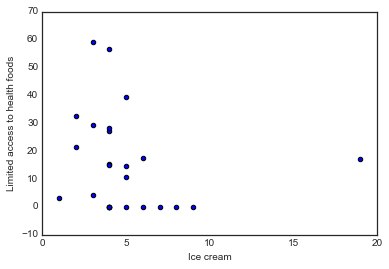

In [25]:
plt.scatter(df['Icecream'], df['Limited access to healthy foods'])
plt.xlabel('Ice cream')
plt.ylabel('Limited access to health foods')

SpearmanrResult(correlation=-0.25846153846153852, pvalue=masked_array(data = 0.20235216243,
             mask = False,
       fill_value = 1e+20)
)

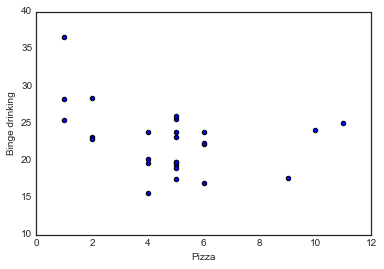

In [30]:
x = 'Pizza'
y = 'Binge drinking'
plt.scatter(df[x], df[y])
plt.xlabel(x)
plt.ylabel(y)
spearmanr(df[x], df[y], nan_policy='omit')

In [23]:
df_rest.melt(id_vars='ZIP', var_name='restaurant', value_name='counts')

,ZIP,restaurant,counts
0,02108,Asian,5.0
1,02109,Asian,5.0
2,02110,Asian,2.0
3,02111,Asian,11.0
4,02113,Asian,1.0
5,02114,Asian,3.0
6,02115,Asian,12.0
7,02116,Asian,5.0
8,02117,Asian,NaN
9,02118,Asian,2.0
